In [1]:
#importing all the necessary libraries

#pip install ta

from getdata import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')


In [2]:
# getdata
XAUUSD = 'GC=F'
df = preprocessing(XAUUSD)
print(df)

                   High          Low         Open        Close  Volume
Date                                                                  
2000-08-30   273.899994   273.899994   273.899994   273.899994     0.0
2000-08-31   278.299988   274.799988   274.799988   278.299988     0.0
2000-09-01   277.000000   277.000000   277.000000   277.000000     0.0
2000-09-05   275.799988   275.799988   275.799988   275.799988     2.0
2000-09-06   274.200012   274.200012   274.200012   274.200012     0.0
...                 ...          ...          ...          ...     ...
2022-07-18  1712.400024  1709.199951  1712.199951  1709.199951   264.0
2022-07-19  1714.400024  1706.099976  1712.300049  1710.000000  1684.0
2022-07-20  1708.500000  1699.500000  1707.099976  1699.500000   130.0
2022-07-21  1715.500000  1679.800049  1687.000000  1712.699951   183.0
2022-07-22  1735.000000  1713.000000  1713.300049  1727.099976   183.0

[5493 rows x 5 columns]


In [3]:
# calculate SMA on 15days, 

# subsetting the dataframe to a new dataframe
df_close_data = df[['Close']]


# SMA 15 days
df_close_data['SMA_15'] = df_close_data[['Close']].rolling(15).mean().shift(1)

# SMA 60 days
df_close_data['SMA_60'] = df_close_data[['Close']].rolling(60).mean().shift(1)

In [4]:
df_close_data.head(100)

,Close,SMA_15,SMA_60
Date,,,
2000-08-30,273.899994,NaN,NaN
2000-08-31,278.299988,NaN,NaN
2000-09-01,277.000000,NaN,NaN
2000-09-05,275.799988,NaN,NaN
2000-09-06,274.200012,NaN,NaN
...,...,...,...
2001-01-18,264.200012,267.953335,268.005001
2001-01-19,264.299988,267.293335,267.906668
2001-01-22,266.399994,266.566667,267.791667


<AxesSubplot:xlabel='Date'>

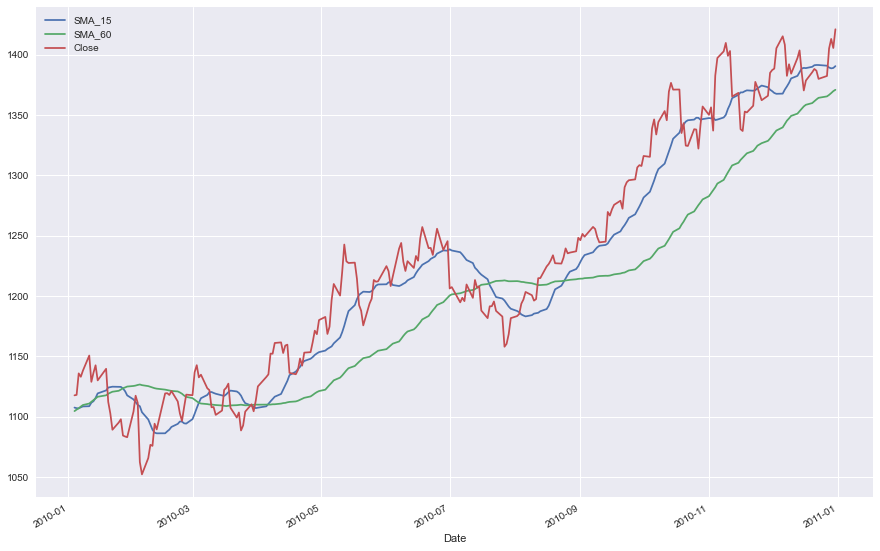

In [5]:
df_close_data[['SMA_15','SMA_60','Close']].loc['2010'].plot(figsize=(15,10))

In [6]:
# MOving standard deviation (MSD)
# its nothing but the moving volatility of the gold price

df_close_data['returns'] = df_close_data['Close'].pct_change(1)

# SMA 15 days
df_close_data['MSD_15'] = df_close_data[['returns']].rolling(15).std().shift(1)

# SMA 60 days
df_close_data['MSD_60'] = df_close_data[['returns']].rolling(60).std().shift(1)

In [7]:
df_close_data.head(20)

,Close,SMA_15,SMA_60,returns,MSD_15,MSD_60
Date,,,,,,
2000-08-30,273.899994,NaN,NaN,NaN,NaN,NaN
2000-08-31,278.299988,NaN,NaN,0.016064,NaN,NaN
2000-09-01,277.000000,NaN,NaN,-0.004671,NaN,NaN
2000-09-05,275.799988,NaN,NaN,-0.004332,NaN,NaN
2000-09-06,274.200012,NaN,NaN,-0.005801,NaN,NaN
2000-09-07,274.000000,NaN,NaN,-0.000729,NaN,NaN
2000-09-08,273.299988,NaN,NaN,-0.002555,NaN,NaN
2000-09-11,273.100006,NaN,NaN,-0.000732,NaN,NaN
2000-09-12,272.899994,NaN,NaN,-0.000732,NaN,NaN


<AxesSubplot:xlabel='Date'>

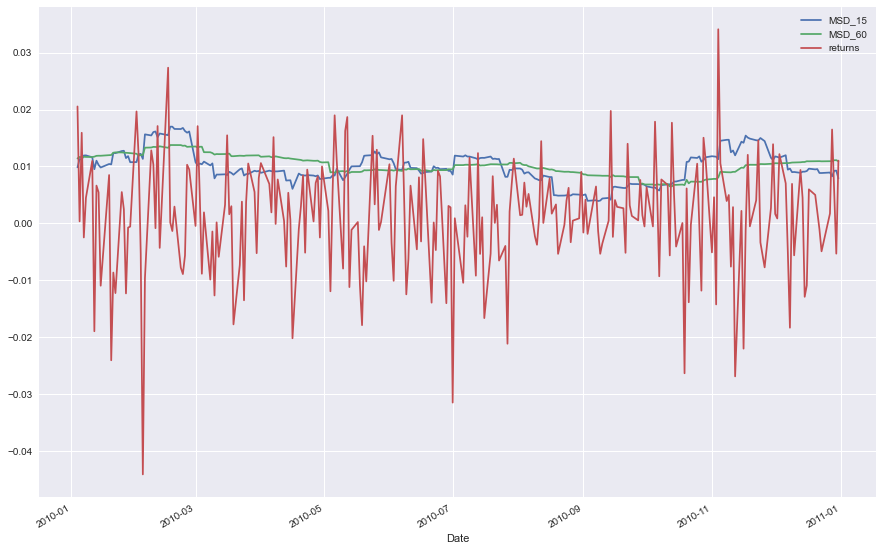

In [8]:
df_close_data[['MSD_15','MSD_60','returns']].loc['2010'].plot(figsize=(15,10))

In [14]:
# creating RSI indicator

RSI = ta.momentum.RSIIndicator(df_close_data.Close, window=14, fillna = False)
RSI

<AxesSubplot:xlabel='Date'>

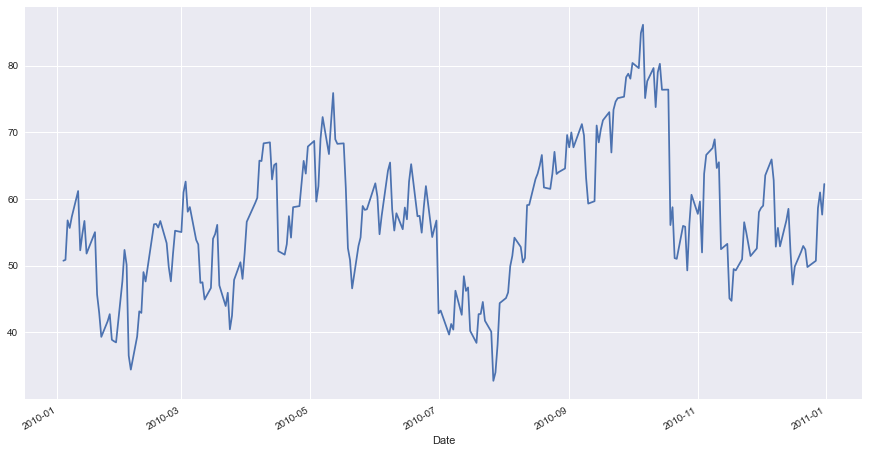

In [15]:
df_close_data['rsi_14'] = RSI.rsi().shift(1)
df_close_data['rsi_14'].loc['2010'].plot(figsize=(15,8))


In [33]:
def feature_engineering(symbol, price_type):

    # get_data
    df = preprocessing(symbol)

    # subset the dataframe
    #df_close_data = df[[price_type]] 
    df_close_data = df.copy()

    # create return for the specific col
    df_close_data['returns'] = df_close_data[price_type].pct_change(1)

    # Create Simple Moving Average (SMA)

    # SMA 15 days
    df_close_data['SMA_15'] = df_close_data[[price_type]].rolling(15).mean().shift(1)

    # SMA 60 days
    df_close_data['SMA_60'] = df_close_data[[price_type]].rolling(60).mean().shift(1)

    # Create Moving Standard Deviation aka Volatility in the price.

    # SMA 15 days
    df_close_data['MSD_15'] = df_close_data[['returns']].rolling(15).std().shift(1)

    # SMA 60 days
    df_close_data['MSD_60'] = df_close_data[['returns']].rolling(60).std().shift(1)

    # create RSI indicator

    RSI = ta.momentum.RSIIndicator(df_close_data[price_type], window=14, fillna = False)
    df_close_data['rsi_14'] = RSI.rsi().shift(1)
    
    return df_close_data

    

In [34]:
feature_engineering('GC=F','Close')

,High,Low,Open,Close,Volume,returns,SMA_15,SMA_60,MSD_15,MSD_60,rsi_14
Date,,,,,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,278.299988,274.799988,274.799988,278.299988,0.0,0.016064,NaN,NaN,NaN,NaN,NaN
2000-09-01,277.000000,277.000000,277.000000,277.000000,0.0,-0.004671,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,2.0,-0.004332,NaN,NaN,NaN,NaN,NaN
2000-09-06,274.200012,274.200012,274.200012,274.200012,0.0,-0.005801,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,1712.400024,1709.199951,1712.199951,1709.199951,264.0,0.003994,1763.413338,1832.756671,0.007482,0.008869,23.694010
2022-07-19,1714.400024,1706.099976,1712.300049,1710.000000,1684.0,0.000468,1755.593335,1828.705003,0.007707,0.008905,26.993548
2022-07-20,1708.500000,1699.500000,1707.099976,1699.500000,130.0,-0.006140,1748.200000,1824.790002,0.007804,0.008909,27.391362
